### Student Information
Name: 陳翼弘

Student ID: 103033617

GitHub ID: YiHungChen

Kaggle name: 22215314

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2021-Lab2-master Repo](https://github.com/fhcalderon87/DM2021-Lab2-master). You may need to copy some cells from the Lab notebook to this notebook. 

---
## 1. Data Preparation

Before beggining the lab, please make sure to download the [Google News Dataset](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) and place it in a folder named "GoogleNews" in the same directory as this file.

## 1.1 Load data

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [1]:
# --- import library --- #
import pandas as pd

In [2]:
# --- training data --- #
train_anger = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt", 
                          sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
train_sadness = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                            sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
train_fear = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
train_joy = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                        sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [3]:
# --- combine 4 sub-dataset --- #
train_df = pd.concat([train_anger, train_fear, train_joy, train_sadness], ignore_index = True)

In [4]:
# --- testing data --- #
test_anger = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
test_sadness = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                           sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
test_fear = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                        sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
test_joy = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                       sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [5]:
# --- combine 4 sub-datset --- #
test_df = pd.concat([test_anger, test_fear, test_joy, test_sadness], ignore_index = True)

In [6]:
train_df.head()  # show the few data in the head

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [7]:
# --- shuffle dataset --- #
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [8]:
print(f'Shape of training df:{train_df.shape}')
print(f'Shape of testing df: {test_df.shape}')

Shape of training df:(3613, 4)
Shape of testing df: (347, 4)


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

In [10]:
train_count_vect = CountVectorizer()
train_df_counts = train_count_vect.fit_transform(train_df.text)
analyze = train_count_vect.build_analyzer()
train_df_counts.shape
train_term_frequencies = []
train_term_frequencies = np.asarray(train_df_counts.sum(axis=0))[0]
train_focus_index = np.argsort(train_term_frequencies)[::-1]
train_focus_voc = [train_count_vect.get_feature_names()[i] for i in train_focus_index[:]]
print(f'first 30 frequent voc in training data: {train_focus_voc[:30]}')

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


first 30 frequent voc in training data: ['the', 'to', 'and', 'you', 'of', 'is', 'it', 'in', 'that', 'my', 'for', 'on', 'be', 'me', 'this', 'so', 'have', 'not', 'just', 'but', 'with', 'at', 'can', 'like', 'all', 'are', 'your', 'was', 'when', 'if']


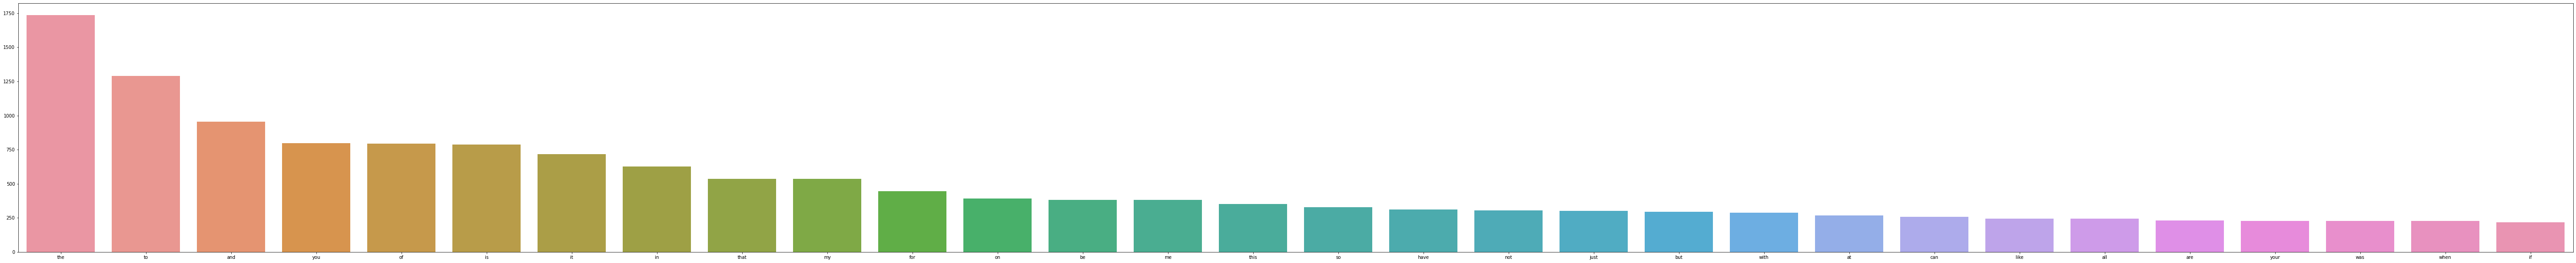

In [11]:
plt.subplots(figsize=(100,10))
figure = sns.barplot(x=train_focus_voc[:30], 
                     y=train_term_frequencies[train_focus_index[:30]])

In [12]:
test_count_vect = CountVectorizer()
test_df_counts = test_count_vect.fit_transform(test_df.text)
analyze = test_count_vect.build_analyzer()
test_df_counts.shape
test_term_frequencies = []
test_term_frequencies = np.asarray(test_df_counts.sum(axis=0))[0]
test_focus_index = np.argsort(test_term_frequencies)[::-1]
test_focus_voc = [test_count_vect.get_feature_names()[i] for i in test_focus_index[:]]
print(f'first 30 frequent voc in testing data: {test_focus_voc[:30]}')

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


first 30 frequent voc in testing data: ['the', 'to', 'and', 'it', 'of', 'you', 'is', 'in', 'for', 'that', 'my', 'on', 'be', 'me', 'was', 'so', 'can', 'at', 'have', 'all', 'just', 'are', 'with', 'but', 'get', 'your', 'up', 'this', 'like', 'not']


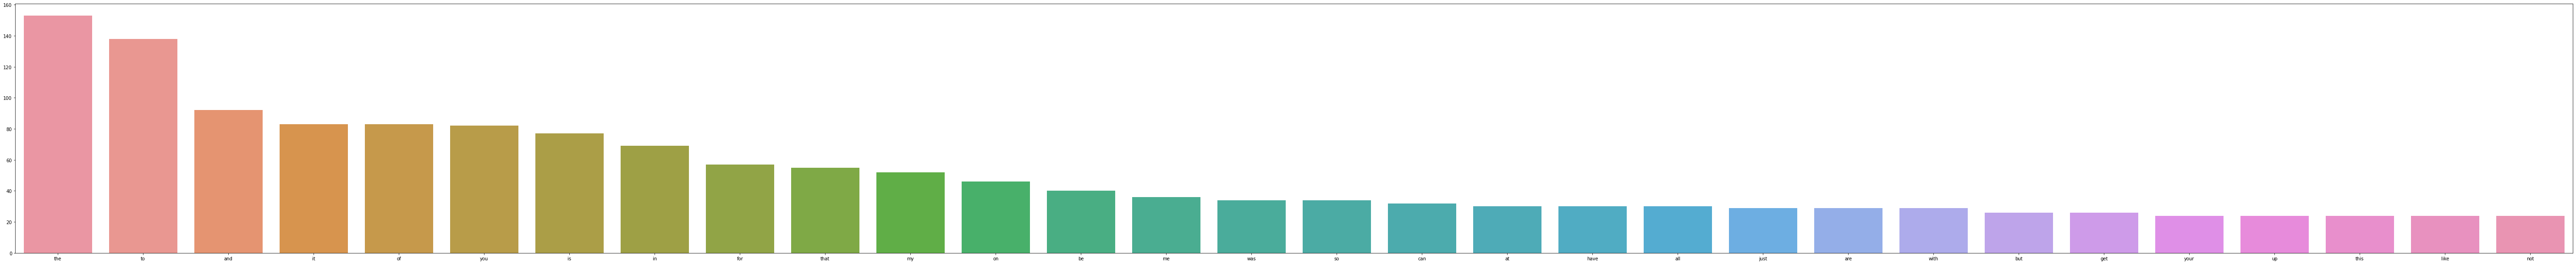

In [13]:
plt.subplots(figsize=(100,10))
figure = sns.barplot(x=test_focus_voc[:30], 
                     y=test_term_frequencies[test_focus_index[:30]])

---
### 1.2 Save data

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [14]:
# --- save to pickle file --- #
train_df.to_pickle("train_df.pkl") 
test_df.to_pickle("test_df.pkl")

In [15]:
import pandas as pd

# --- load a pickle file --- #
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

---
### 1.3 Exploratory data analysis (EDA)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [16]:
# --- group to find distribution --- #
train_df.groupby(['emotion']).count()['text']

emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

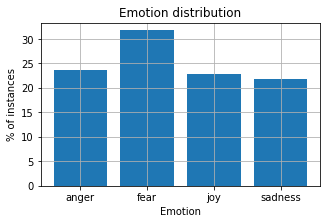

In [17]:
%matplotlib inline

# --- calculate the histogram --- #
post_total = len(train_df)
emotion_value = train_df.groupby(['emotion']).count()['text']
emotion_value = emotion_value.apply(lambda x: round(x * 100 / post_total, 3))

# --- plot --- #
figure, axis = plt.subplots(figsize=(5,3))
plt.bar(emotion_value.index, emotion_value.values)

# --- rearragne labels --- #
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()


## 2. Feature engineering
### Using Bag of Words
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
# --- build analyzers for bag of words --- #
BOW_vectorizer = CountVectorizer()

BOW_vectorizer.fit(train_df['text'])

train_BOW_features = BOW_vectorizer.transform(train_df.text)
test_BOW_features = BOW_vectorizer.transform(test_df.text)

train_BOW_features

type(train_BOW_features)

train_BOW_features.toarray()
train_BOW_features.shape

(3613, 10115)

In [19]:
feature_names = BOW_vectorizer.get_feature_names()
feature_names[100:110]

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s', '31']

In [20]:
"😂" in feature_names

False

In [21]:
import nltk

# --- build analyzers bag of words --- #
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize)

# --- apply analyzer to training data --- #
BOW_500.fit(train_df['text'])

train_BOW_features_500 = BOW_500.transform(train_df['text'])

# --- check dimension --- #
train_BOW_features_500.shape

/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3613, 500)

In [22]:
# --- observe some featuer names --- #
feature_names_500 = BOW_500.get_feature_names()
feature_names_500[100:110]

['change',
 'cheer',
 'cheerful',
 'cheering',
 'cheery',
 'class',
 'come',
 'comes',
 'could',
 'country']

In [23]:
"😂" in feature_names_500

True

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
TFIDF_1000 = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)

TFIDF_1000.fit(train_df.text)
train_TFIDF_1000_features = TFIDF_1000.transform(train_df.text)

In [25]:
train_TFIDF_1000_features.shape
# train_TFIDF_1000_features[0].toarray()

(3613, 1000)

In [26]:
feature_names_TFIDF_1000 = TFIDF_1000.get_feature_names()
feature_names_TFIDF_1000[100:110]

['b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc', 'bday', 'be']

---
## 3. Model
### 3.1 Decision Trees
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [27]:
from sklearn.tree import DecisionTreeClassifier

# --- training Data ---#
train_input = BOW_500.transform(train_df.text)
train_output = train_df.emotion

# --- test Data --- #
test_input = BOW_500.transform(test_df.text)
test_output = test_df.emotion

# --- print shape of the data --- #
print(f'Training input shape: {train_input.shape}')
print(f'Training output shape: {train_output.shape}')
print(f'Testing input shape: {test_input.shape}')
print(f'Testing output shape: {test_output.shape}')


Training input shape: (3613, 500)
Training output shape: (3613,)
Testing input shape: (347, 500)
Testing output shape: (347,)


In [28]:
# --- build decision tree model --- #
DT_model = DecisionTreeClassifier(random_state = 0)

# --- model training --- #
DT_model = DT_model.fit(train_input, train_output)

# --- predict --- #
train_predict= DT_model.predict(train_input)
test_predict = DT_model.predict(test_input)

# --- show the prediction results --- #
test_predict[:10]

array(['joy', 'sadness', 'sadness', 'sadness', 'joy', 'fear', 'joy',
       'anger', 'anger', 'joy'], dtype=object)

In [29]:
# --- accuracy --- #
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

train_acc = accuracy_score(y_true = train_output, y_pred = train_predict)
test_acc = accuracy_score(y_true = test_output, y_pred = test_predict)

print(f'training accuracy: {train_acc:.2f}')
print(f'testing accuracy: {test_acc:.2f}')
print(classification_report(y_true= test_output, y_pred=test_predict))

training accuracy: 0.99
testing accuracy: 0.66
              precision    recall  f1-score   support

       anger       0.64      0.69      0.67        84
        fear       0.65      0.67      0.66       110
         joy       0.68      0.66      0.67        79
     sadness       0.66      0.59      0.62        74

    accuracy                           0.66       347
   macro avg       0.66      0.65      0.66       347
weighted avg       0.66      0.66      0.66       347



In [30]:
# --- check by confusion matrix --- #
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true = test_output, y_pred = test_predict)
print(cm)

[[58 16  6  4]
 [14 74 10 12]
 [ 9 11 52  7]
 [ 9 13  8 44]]


In [31]:
# --- Function for visualizing confusion matrix --- #
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap= sns.cubehelix_palette(as_cmap=True)):
    classes.sort()
    tick_marks = np.arange(len(classes))
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes,
           yticklabels=classes,
           title=title,
           xlabel='True label',
           ylabel='Predict label')
    fmt='d'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment='center', color='white' if cm[i, j] > thresh else 'black')
        ylim_top = len(classes) -0.5
        plt.ylim([ylim_top, -.5])
        plt.tight_layout()
        plt.show

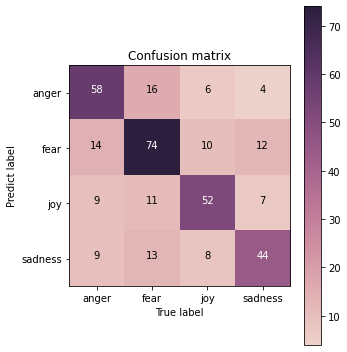

In [32]:
# --- plot confusion matrix --- #
my_tags = ['anger','fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

from the previous confused matrix, we can see that, the category of anger and fear are very easy to be confused. It is very clear to understand. Because the emotion of anger and fear is originally very confusion feeling. It is also possible that a single tweet is having both anger and fear in the same time. However, only one label is able to be given.

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [33]:
# --- appling naive bayes classification --- #
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB(binarize = 0.0)
bnb.fit(train_input, train_output)

train_predict_bnb = bnb.predict(train_input)
test_predict_bnb = bnb.predict(test_input)

In [34]:
# --- accuarcy pf naive bayes --- #
train_acc_bnb = accuracy_score(y_true=train_output, y_pred=train_predict_bnb)
test_acc_bnb = accuracy_score(y_true=test_output, y_pred=test_predict_bnb)

print(f'training accuracy of naive bayes: {train_acc_bnb:.2f}')
print(f'testing accuracy of naive bayes: {test_acc_bnb:.2f}')

training accuracy of naive bayes: 0.79
testing accuracy of naive bayes: 0.69


In [35]:
# --- precision, recall, f1-score --- #
print(classification_report(y_true=test_output, y_pred=test_predict_bnb))

              precision    recall  f1-score   support

       anger       0.61      0.68      0.64        84
        fear       0.72      0.75      0.73       110
         joy       0.80      0.66      0.72        79
     sadness       0.65      0.64      0.64        74

    accuracy                           0.69       347
   macro avg       0.69      0.68      0.69       347
weighted avg       0.69      0.69      0.69       347



In [36]:
# --- check by confusion matrix --- #
cm_bnb = confusion_matrix(y_true=test_output, y_pred=test_predict_bnb)
print(cm_bnb)

[[57 13  5  9]
 [16 83  3  8]
 [10  9 52  8]
 [11 11  5 47]]


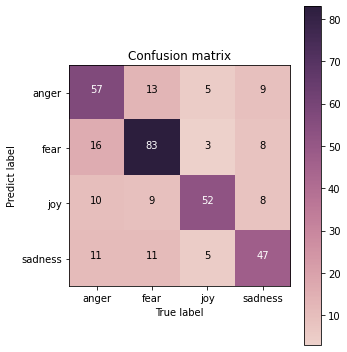

In [37]:
# --- plot confusion matrix --- #
plot_confusion_matrix(cm_bnb, classes=my_tags)

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

To be honest, the difference are not that clear to tell in both methods. It might related to that both the methods are sharing the close accuracy score.

## 5. Other things you can try

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by: 
    * Trying different features (Feature engineering)
        -Eg. Word2Vec,PCA,LDA,FastText, Clustering......
    * Trying different models
    * Analyzing your results and interpret them to improve your feature engineering/model building process
    * Iterate through the steps above until finding a satisfying result
Remember that you should also consider the task at hand and the model you'll feed the data to. 

---
## 6. Deep Learning

We use [Keras](https://keras.io/) to be our deep learning framwork, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models. 

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

In [38]:
import keras
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(train_output)

print(f'check label: {label_encoder.classes_}')
print(f'--- Before convert ---')
print(f'first 4 output label: \n{train_output[:4]}\n'
      f'shape of the training output: {train_output.shape}\n'
      f'shape of the testing output : {test_output.shape}')

# --- function for label encoding --- #
def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.np_utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

train_output = label_encode(label_encoder, train_output)
test_output = label_encode(label_encoder, test_output)

print(f'--- After convert ---')
print(f'first 4 output label: \n{train_output[:4]}\n'
      f'shape of the training output: {train_output.shape}\n'
      f'shape of the testing output : {test_output.shape}')

2022-01-12 16:51:39.084717: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-12 16:51:39.084735: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


check label: ['anger' 'fear' 'joy' 'sadness']
--- Before convert ---
first 4 output label: 
240     anger
2242      joy
1466     fear
478     anger
Name: emotion, dtype: object
shape of the training output: (3613,)
shape of the testing output : (347,)
--- After convert ---
first 4 output label: 
[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]
shape of the training output: (3613, 4)
shape of the testing output : (347, 4)


In [39]:
# --- check dimesion of the input and output --- #
input_shape = train_input.shape[1]
output_shape = train_output.shape[1]

print(f'input shape of : {input_shape}\n'
      f'output shape of: {output_shape}')

input shape of : 500
output shape of: 4


In [40]:
# --- build models --- #
from keras.models import Model
from keras.layers import Input, Dense, ReLU, Softmax

# --- input layer --- #
model_input = Input(shape=(input_shape, ))
X = model_input

# --- 1st hidden layer --- #
X_W1 = Dense(units=64)(X)
H1 = ReLU()(X_W1)

# --- 2nd hidden layer --- #
H1_W2 = Dense(units=64)(H1)
H2 = ReLU()(H1_W2)

# --- output layer --- #
H2_W3 = Dense(units=output_shape)(H2)
H3 = Softmax()(H2_W3)

model_output = H3

# --- create model --- #
model = Model(inputs=[model_input], outputs=[model_output])

# --- loss function & optimizer --- #
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# --- show model construction --- #
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 dense (Dense)               (None, 64)                32064     
                                                                 
 re_lu (ReLU)                (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 re_lu_1 (ReLU)              (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
 softmax (Softmax)           (None, 4)                 0     

2022-01-12 16:51:39.958344: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-12 16:51:39.958652: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-12 16:51:39.958692: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-01-12 16:51:39.958728: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-01-12 16:51:39.959928: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [41]:
from keras.callbacks import CSVLogger
csv_logger = CSVLogger('logs/training_log.csv')

# --- training setting --- #
epochs = 8
batch_szie = 32

# --- training process --- #
history = model.fit(train_input, train_output,
                    epochs=epochs,
                    batch_size=batch_szie,
                    callbacks=[csv_logger],
                    validation_data=[test_input, test_output])
print(f'training finished')

Epoch 1/8


/usr/local/lib/python3.8/dist-packages/tensorflow/python/framework/indexed_slices.py:448: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 64), dtype=float32), dense_shape=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


113/113 [==============================] - 1s 2ms/step - loss: 1.3341 - accuracy: 0.3623 - val_loss: 1.2908 - val_accuracy: 0.4150
Epoch 2/8
113/113 [==============================] - 0s 2ms/step - loss: 1.0022 - accuracy: 0.6327 - val_loss: 0.9394 - val_accuracy: 0.6455
Epoch 3/8
113/113 [==============================] - 0s 3ms/step - loss: 0.5877 - accuracy: 0.7982 - val_loss: 0.7878 - val_accuracy: 0.6772
Epoch 4/8
113/113 [==============================] - 0s 3ms/step - loss: 0.4105 - accuracy: 0.8544 - val_loss: 0.7785 - val_accuracy: 0.7003
Epoch 5/8
113/113 [==============================] - 0s 2ms/step - loss: 0.3254 - accuracy: 0.8868 - val_loss: 0.7900 - val_accuracy: 0.6859
Epoch 6/8
113/113 [==============================] - 0s 3ms/step - loss: 0.2610 - accuracy: 0.9109 - val_loss: 0.8476 - val_accuracy: 0.6830
Epoch 7/8
113/113 [==============================] - 0s 4ms/step - loss: 0.2145 - accuracy: 0.9305 - val_loss: 0.8868 - val_accuracy: 0.6772
Epoch 8/8
113/113 [====

In [42]:
# --- prediction --- #
pred_result = model.predict(test_input, batch_size=128)
pred_result[:5]

array([[3.4902501e-01, 2.4739648e-01, 2.1364154e-01, 1.8993700e-01],
       [5.6561865e-03, 2.5967353e-03, 8.5352815e-04, 9.9089360e-01],
       [1.1004037e-03, 1.1917076e-03, 1.0077026e-04, 9.9760711e-01],
       [5.9096068e-01, 4.7249652e-02, 5.0907274e-04, 3.6128065e-01],
       [9.6193462e-04, 9.8649132e-01, 1.1899346e-02, 6.4736936e-04]],
      dtype=float32)

In [43]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

print(f'test accuracy: {accuracy_score(label_decode(label_encoder, test_output), pred_result):.2f}')

test accuracy: 0.68


In [44]:
# --- training log --- #
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.362303,1.334142,0.414986,1.290754
1,1,0.632715,1.002219,0.645533,0.939449
2,2,0.798229,0.587714,0.677233,0.787755
3,3,0.854415,0.410467,0.700288,0.778453
4,4,0.886798,0.325378,0.685879,0.789966
5,5,0.910877,0.260972,0.682997,0.847570
6,6,0.930529,0.214484,0.677233,0.886822
7,7,0.945475,0.180989,0.680115,0.958453


---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

Text(0.5, 1.0, 'Training Accuracy per epoch')

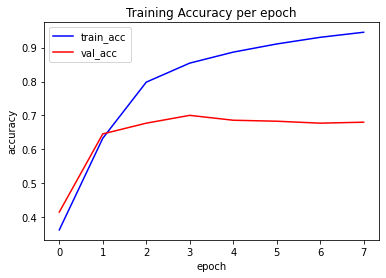

In [45]:
fig, ax = plt.subplots()
ax.plot(training_log.epoch, training_log.accuracy, 'b', label='train_acc')
ax.plot(training_log.epoch, training_log.val_accuracy, 'r', label='val_acc')

plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Training Accuracy per epoch')



Text(0.5, 1.0, 'Training loss per epoch')

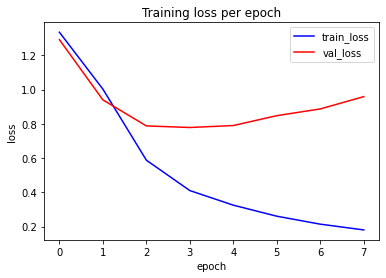

In [46]:
fig, ax = plt.subplots()
ax.plot(training_log.epoch, training_log.loss, 'b', label='train_loss')
ax.plot(training_log.epoch, training_log.val_loss, 'r', label='val_loss')

plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Training loss per epoch')



The results is more likely to be overfitting since the validation loss turned backward in the very begining of the training process and the training loss is still decreasing.

---
## 7. Word2Vector

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

In [47]:
# --- check library --- #
import gensim

# --- ignore warnings
import warnings
warnings.filterwarnings('ignore')

# --- input type --- #
train_df['text_tokenized'] = train_df.text.apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
240,10240,@UnitedFrontRev @JuanDeznuts @LucidHurricane_ ...,"[@, UnitedFrontRev, @, JuanDeznuts, @, LucidHu..."
2242,30238,Only Geo is capable of cheering me up❤️❤️❤️,"[Only, Geo, is, capable, of, cheering, me, up❤..."
1466,20609,@Joey7Barton I remember Joey slagging England ...,"[@, Joey7Barton, I, remember, Joey, slagging, ..."
478,10478,Now that @Jasmine_Wrn has snapchat back it's a...,"[Now, that, @, Jasmine_Wrn, has, snapchat, bac..."
3100,40273,@DoubleEph sadly his best days are behind him,"[@, DoubleEph, sadly, his, best, days, are, be..."


In [48]:
# --- create the training corpus --- #
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['@', 'UnitedFrontRev', '@', 'JuanDeznuts', '@', 'LucidHurricane_', 'sex', 'offense', 'happens', 'across', 'ALL', 'races', ',', 'cultures', ',', 'and', 'creeds', '&', 'amp', ';', 'they', 'should', 'be', 'castrated']),
       list(['Only', 'Geo', 'is', 'capable', 'of', 'cheering', 'me', 'up❤️❤️❤️']),
       list(['@', 'Joey7Barton', 'I', 'remember', 'Joey', 'slagging', 'England', 'player', "'s", 'off', 'bringing', 'out', 'books', 'after', 'crap', 'tournaments', '..', 'same', 'same', '..', 'crap', 'player', '#', 'bully'])],
      dtype=object)

In [49]:
from gensim.models import Word2Vec

# --- setting --- #
vector_dim = 100
window_size = 5
min_count = 1
training_iter = 20

# --- model --- #
word2vec_model = Word2Vec(sentences=training_corpus,
                          vector_size=vector_dim, window=window_size,
                          min_count=min_count, epochs=training_iter)

In [50]:
# --- get the corresponding vector of ta word --- #
word_vec = word2vec_model.wv['happy']
word_vec

array([ 0.39641377,  0.33000946, -0.33501834, -0.27001038, -0.25442654,
       -1.0196531 ,  0.12333291,  1.1219963 , -0.55185443, -0.23281977,
       -0.12892333, -0.54560435, -0.09186648,  0.40061504, -0.08456475,
       -0.530029  ,  0.6209276 , -0.4257343 ,  0.17987101, -1.4573096 ,
        0.67398155,  0.51922894,  0.45036462, -0.27445394,  0.3201067 ,
        0.05558944, -0.7496307 ,  0.36815447, -0.5573116 ,  0.06436432,
        0.27930504,  0.30750754,  0.7511885 , -0.88631904,  0.16566464,
        0.6739284 ,  0.12859076, -0.22084525, -0.804868  , -0.1925275 ,
       -0.03710834, -0.15030463, -0.4302834 ,  0.20496456,  0.46069038,
       -0.26129395, -0.7096597 ,  0.04448142,  0.5367647 ,  0.38662645,
        0.21956281, -0.63796043, -0.25775322,  0.25424218, -0.5839552 ,
       -0.12918073, -0.01329425, -0.48555672, -0.09842058,  0.26956838,
        0.23747547, -0.10979056,  0.44189885,  0.21337411, -0.95835674,
        1.0434182 ,  0.25918743,  0.49110034, -1.2533287 ,  0.72

In [51]:
# --- Get the most similar words --- #
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('bday', 0.9425796270370483),
 ('birthday', 0.9294325709342957),
 ('O', 0.921481728553772),
 ('cats', 0.9177795648574829),
 ('Be', 0.9165452718734741),
 ('infuriate', 0.9149669408798218),
 ('keeping', 0.9134902358055115),
 ('Kik', 0.9096055626869202),
 ('forever', 0.9088492393493652),
 ('^_^', 0.9081109762191772)]

In [52]:
from gensim.models import KeyedVectors
model_path = "~/NAS_NEAF/課程/2021_DataMining/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print(f'load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

#### (2) Using gensim api

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [53]:
import gensim.downloader as api

import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

load ok


[('birthday', 0.9577818512916565),
 ('thank', 0.937666654586792),
 ('welcome', 0.93361496925354),
 ('love', 0.9176183342933655),
 ('miss', 0.9164500832557678),
 ('hello', 0.9158351421356201),
 ('thanks', 0.915008544921875),
 ('merry', 0.9053249359130859),
 ('bless', 0.902732253074646),
 ('wish', 0.9013164043426514)]

In [54]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


One way is using positive to sum up all the vectors and calculating the similarity between the sentence to the target emotions, the highest emotions can be considered as the reuslt. The other method is preserving all the vectors by concating all the words verticlely. In this way a sentence will be converted to a two dimentional feature. Then it is possible to use convolution and flatten layer to training the model.

### 8. Clustering: k-means

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [55]:
# --- clustring target ---#
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print(f'target words: {target_list}')

# --- convert to word vector --- #
X = [word2vec_model.wv[word] for word in target_list]

target words: ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [56]:
from sklearn.cluster import KMeans

k = 2

kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# --- cluster result --- #
cluster_result = kmeans_model.labels_

# --- print cluster results --- #
for i in range(len(target_list)):
    print(f'word: {target_list[i]}\tcluster:{cluster_result[i]}')

word: happy	cluster:1
word: fear	cluster:1
word: angry	cluster:1
word: car	cluster:0
word: teacher	cluster:0
word: computer	cluster:0


In [57]:
# --- check cluster membership --- #
word = 'student'
wrd_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1], dtype=int32)

In [58]:
# --- check cluster membership --- #
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1], dtype=int32)

In [59]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for  word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print(f'happy_words: {happy_words}')
print(f'angry_words: {angry_words}')
print(f'data_words: {data_words}')
print(f'mining_words: {mining_words}')

target_words = happy_words + angry_words + data_words + mining_words
print(f'\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words: ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words: ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words: ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words: ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


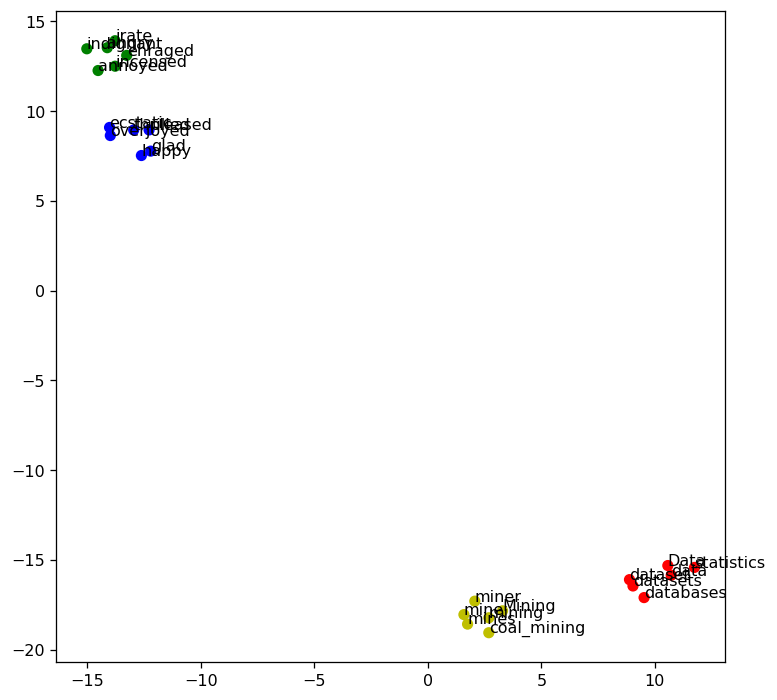

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
#all_word = list(model.vocab.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [61]:
word_list = ['happy', 'angry', 'sad', 'fear']

topn = 15
happy_words = ['happy'] + [word_ for  word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print(f'happy_words: {happy_words}')
print(f'angry_words: {angry_words}')
print(f'sad_words: {data_words}')
print(f'fear_words: {mining_words}')

target_words = happy_words + angry_words + data_words + mining_words
print(f'\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words: ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
angry_words: ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
sad_words: ['sad', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'information', 'database', 'Data_System_IPEDS', 'data.The', 'OpenSpirit_enabled', 'datafeeds', 'microdata', 'operator_Telecity', 'GT_Datamaker', 'datawarehouse']
fear_words: ['fear', 'Mining', 'mines', 'coal_mining', 'mine', 'miner', 'uranium_mining', 'miners', 'Mountaintop_removal_coal', 'goldmining', 'alluvial_mining', 'Ok_Tedi_copper', 'uranium_mines', 'coal_mines', 'openpit_mining', 'Mines']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disapp

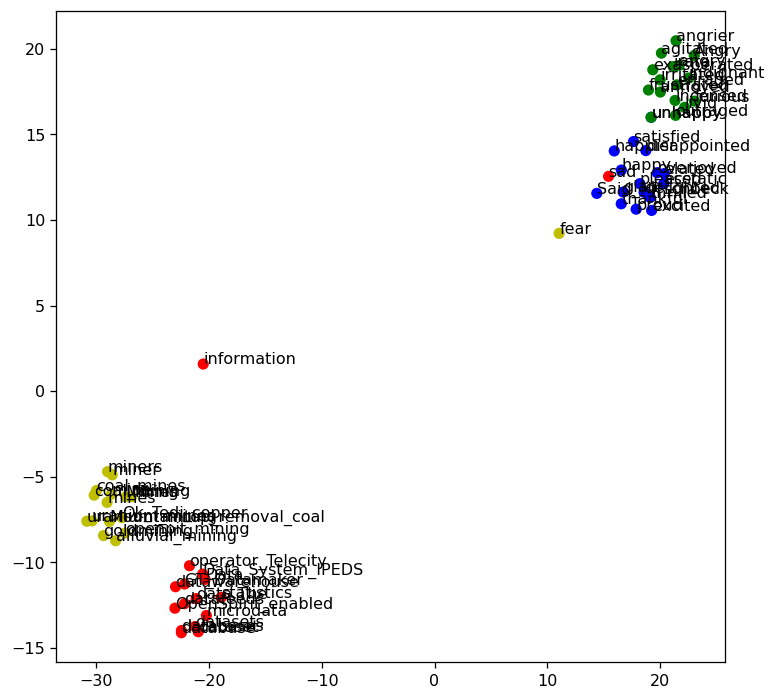

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
#all_word = list(model.vocab.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

2. Second: __This part is worth30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/c/dm2021-lab2-hw2/) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 24th 11:59 pm, Friday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 

Since the constructure of the code is a little bit complicate. The final report is being written in the form of word [Lab 2 reposrt.pdf]. The code is also available in another github repository https://github.com/YiHungChen/emotion_prediction.git

4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 29th 11:59 pm, Wednesday)__. 